In [166]:
from sklearn.datasets import make_moons
X = make_moons(n_samples=1000, noise=0.1, random_state=42)[0]
X[:10]

array([[-0.05146968,  0.44419863],
       [ 1.03201691, -0.41974116],
       [ 0.86789186, -0.25482711],
       [ 0.288851  , -0.44866862],
       [-0.83343911,  0.53505665],
       [ 0.61370557, -0.24236929],
       [ 0.2864947 , -0.20127661],
       [-0.05610416,  0.4770791 ],
       [ 1.60421687, -0.30354141],
       [ 0.70964149,  0.85886674]])

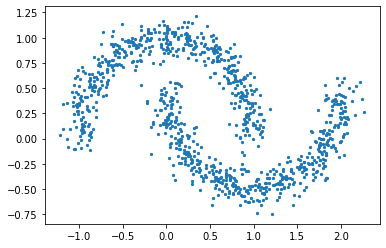

In [167]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],s=5)

In [173]:
# 训练
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.10, min_samples=5, n_jobs=-1)
db.fit(X)

DBSCAN(eps=0.1, n_jobs=-1)

In [174]:
labels = db.labels_
labels[:10]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1])

In [175]:
# 核心对象排除了边界点和离群点
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask[:10]

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True])

In [176]:
# 离群点
anomalies_mask = labels == -1
n_noise = list(anomalies_mask).count(1)
print(n_noise)
# 边界点
boundary_mask = ~(anomalies_mask | core_samples_mask)

28


In [177]:
# 簇的数量
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters

2

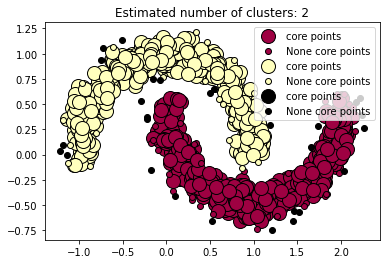

In [202]:
# 画图1
# Black removed and is used for noise instead.
import numpy as np
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
        label="core points"
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
        label="None core points"
    )
    plt.legend()

plt.title("Estimated number of clusters: %d" % n_clusters)
plt.show()

In [196]:
# 画图2
def plot_dbscan(dbscan, X, size):
    """size指eps覆盖的范围"""
    # 核心点mask
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    
    # 离群点mask
    anomalies_mask = dbscan.labels_ == -1
    
    # 边界点mask
    boundary_mask = ~(anomalies_mask | core_samples_mask)
    
    # 取出样本
    cores = X[core_samples_mask]   # 核心样本
    anomalies = X[anomalies_mask]
    boundaried = X[boundary_mask]
    
    # 绘图
    plt.scatter(cores[:,0], cores[:,1], c=dbscan.labels_[core_samples_mask], 
                marker='o', s=size, cmap='Paired', label='eps')
    plt.scatter(cores[:,0], cores[:,1], c=dbscan.labels_[core_samples_mask], 
                marker='.', s=10, label="core")
    plt.scatter(anomalies[:,0], anomalies[:,1], c='r', marker='x', s=30, label="anomalies")
    plt.scatter(boundaried[:,0], boundaried[:,1], c=dbscan.labels_[boundary_mask], 
                marker='^', s=30, label="boundary")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(f"eps:{dbscan.eps}, min_samples:{dbscan.min_samples}")
    plt.legend()

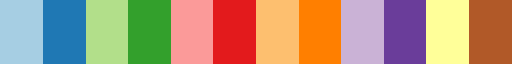

In [197]:
import matplotlib
matplotlib.cm.get_cmap('Paired')

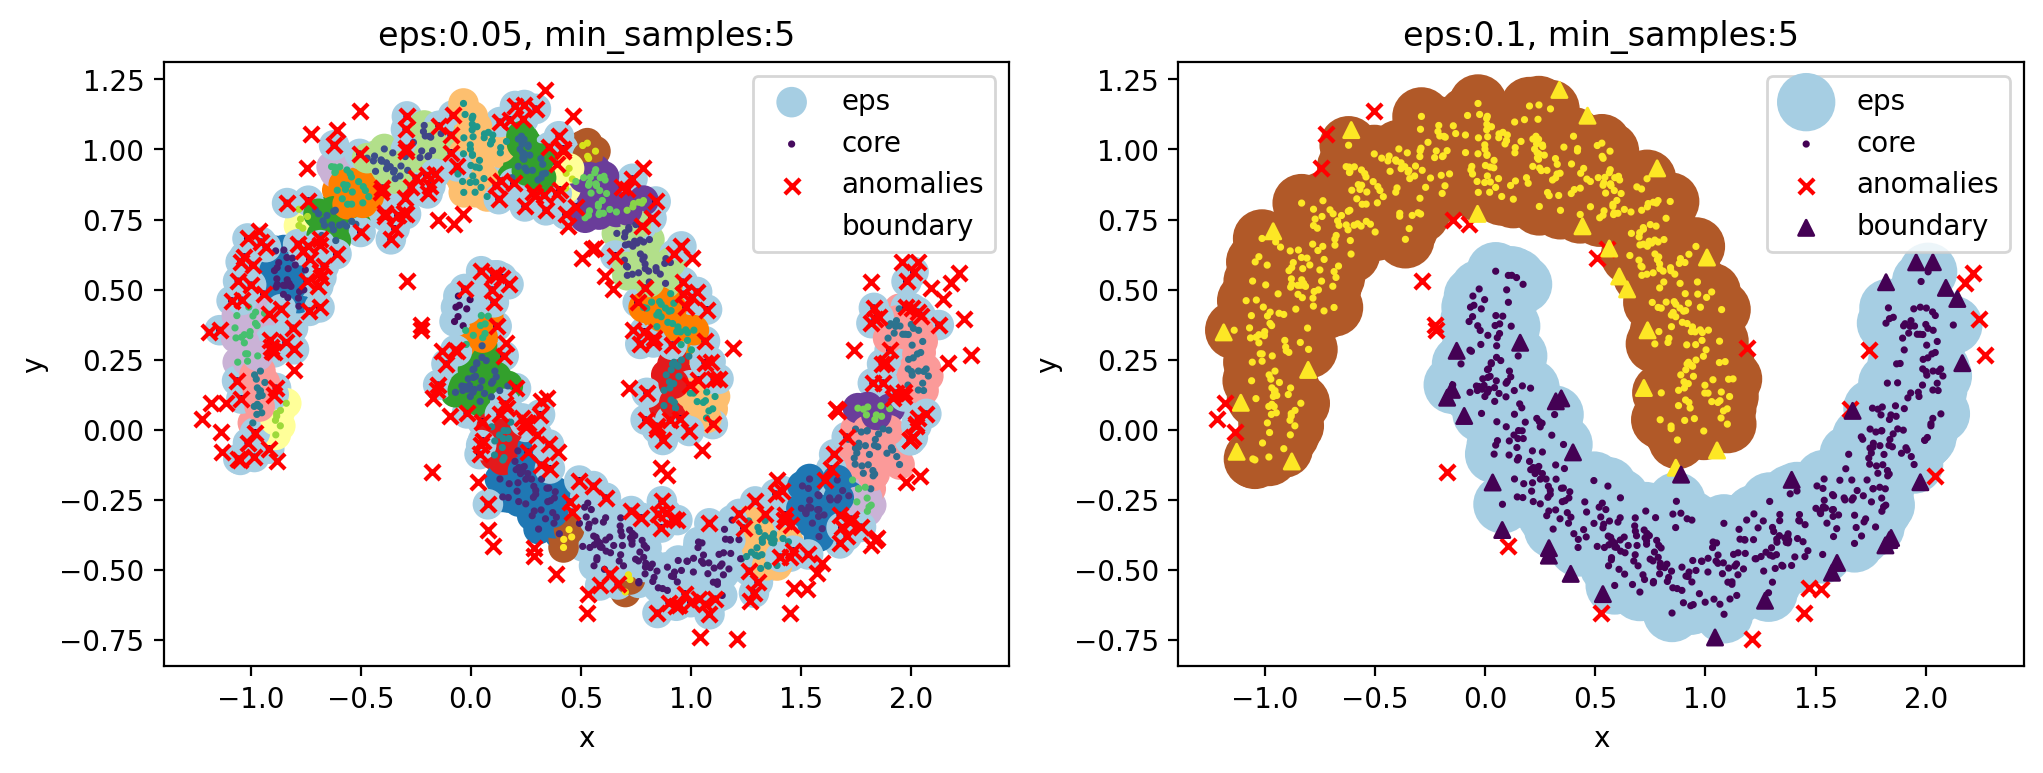

In [224]:
db0 = DBSCAN(eps=0.05, min_samples=5, n_jobs=-1)
db0.fit(X)

plt.figure(figsize=(12,4),dpi=200)
plt.subplot(1,2,1)
plot_dbscan(db0, X, size=100)

plt.subplot(1,2,2)
plot_dbscan(db, X, size=400)
plt.show()